In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Today we will explore a data set dedicated to the cost of treatment of different patients. The cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age and so on. We have no data on the diagnosis of patients. But we have other information that can help us to make a conclusion about the health of patients and practice regression analysis.


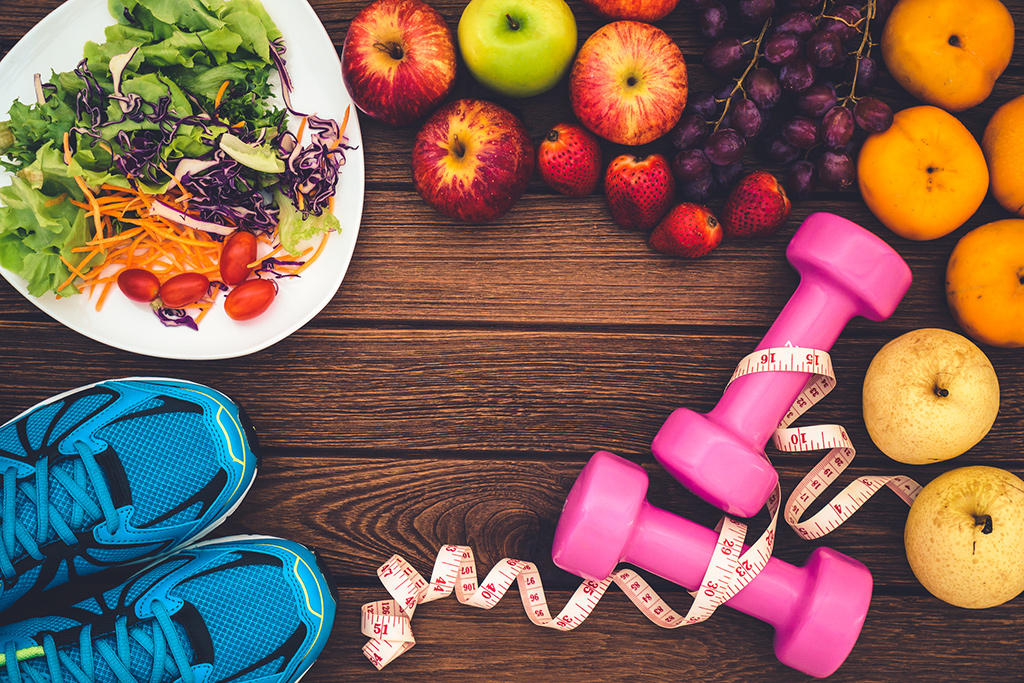

In [5]:
from IPython.display import Image
Image(filename='picture.jpg') 

In [6]:
data = pd.read_csv('insurance.csv')

In [7]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [10]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

Let us now encode our categorical variables

In [11]:
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
# smoker or not
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
#region
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

In [12]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [13]:
data.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

A strong correlation is observed only with the factor if a patient smokes or not. A higher correlation with the BMI would have made more sense.

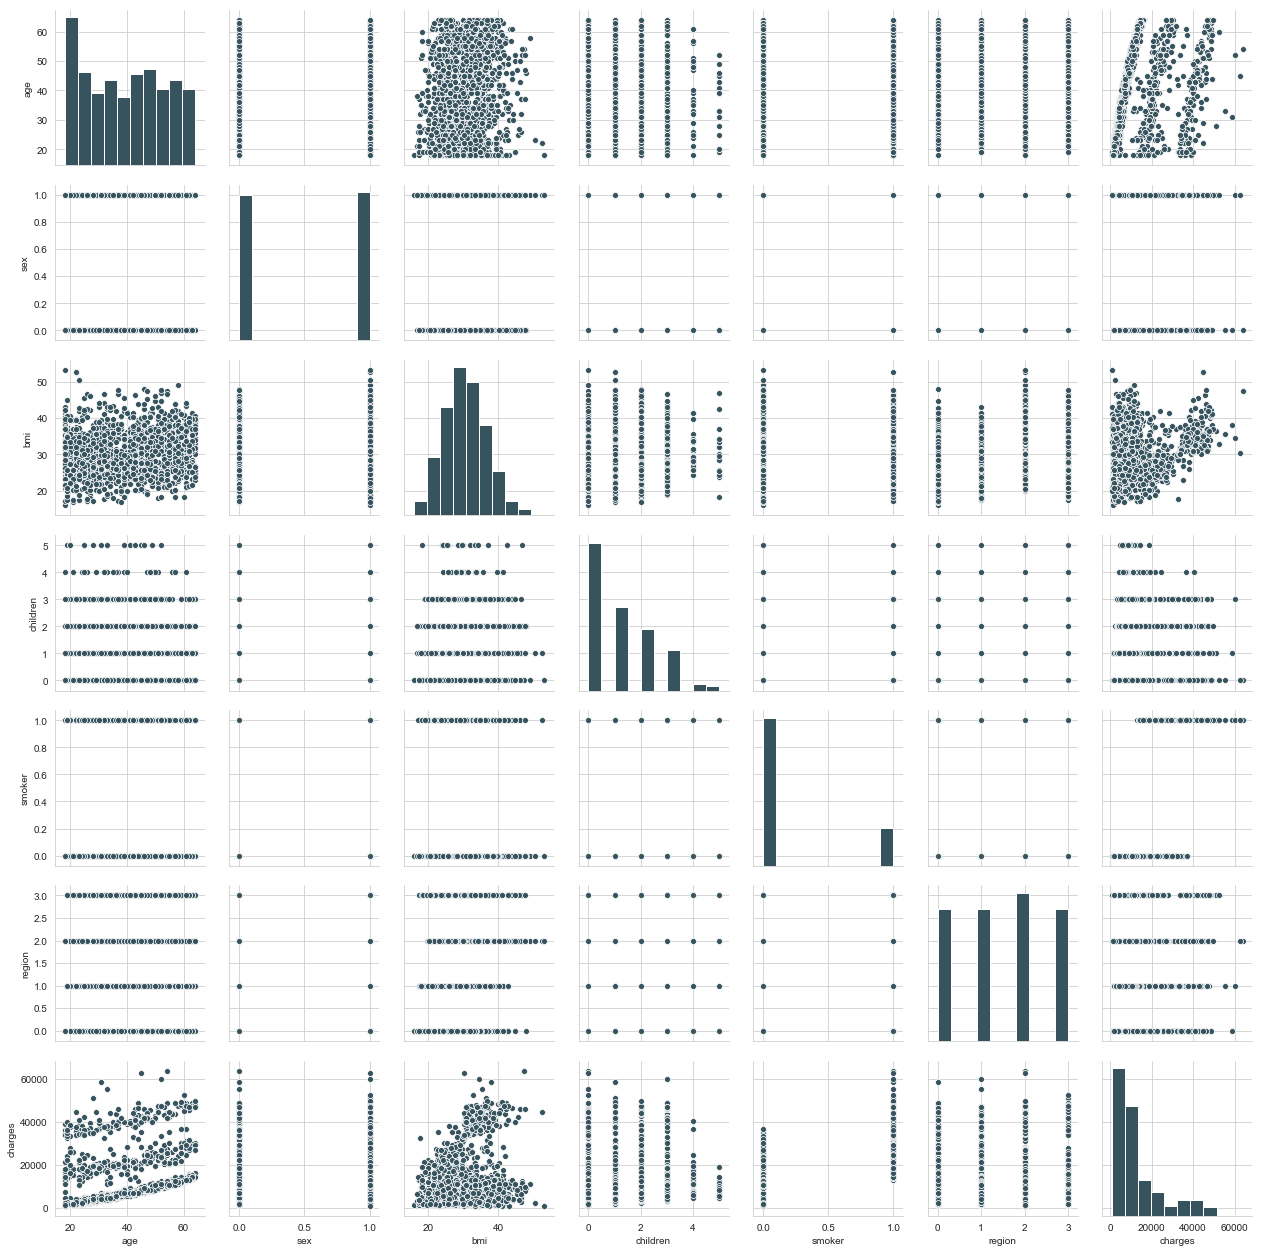

In [14]:
sns.pairplot(data)

Text(0.5, 1.0, 'Insurance Correlation')

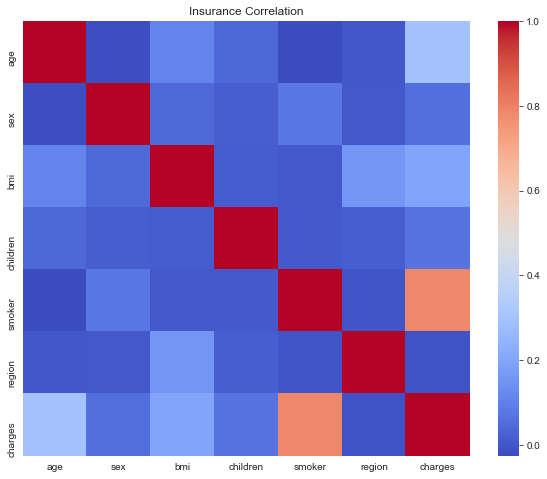

In [15]:
plt.subplots(figsize=(10,8))
corr = data.corr()
sns.heatmap(corr, cmap = 'coolwarm')
plt.title('Insurance Correlation')

Let us take a look at the distribution of charges to help us know how much patients spend on treatments on average.

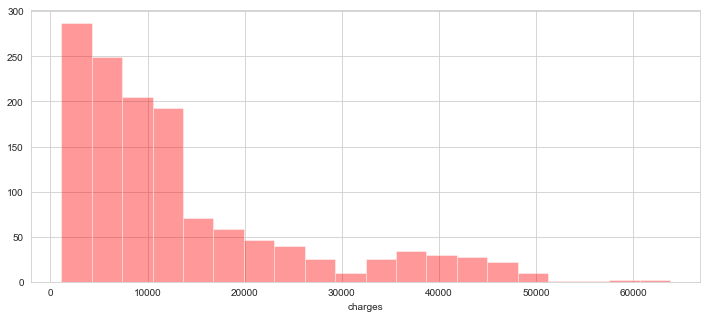

In [16]:
plt.figure(figsize = (12,5))
sns.distplot(data['charges'],kde = False,bins=20,color='red')

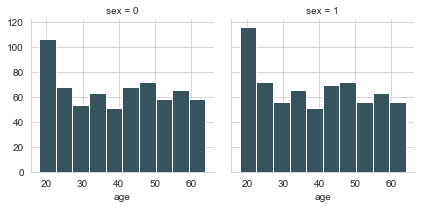

In [17]:
g = sns.FacetGrid(data=data,col='sex')
g.map(plt.hist,'age')

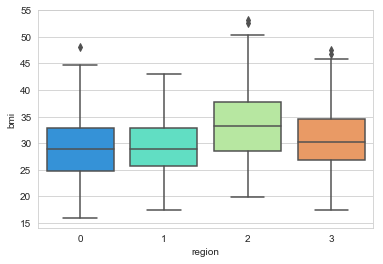

In [18]:
sns.boxplot(x='region',y='bmi',data=data,palette='rainbow')

When we take a look at the BMI values observed in all 4 regions, the values range from 28-33. Let's take a look at the BMI chart below to see what category this range falls under.

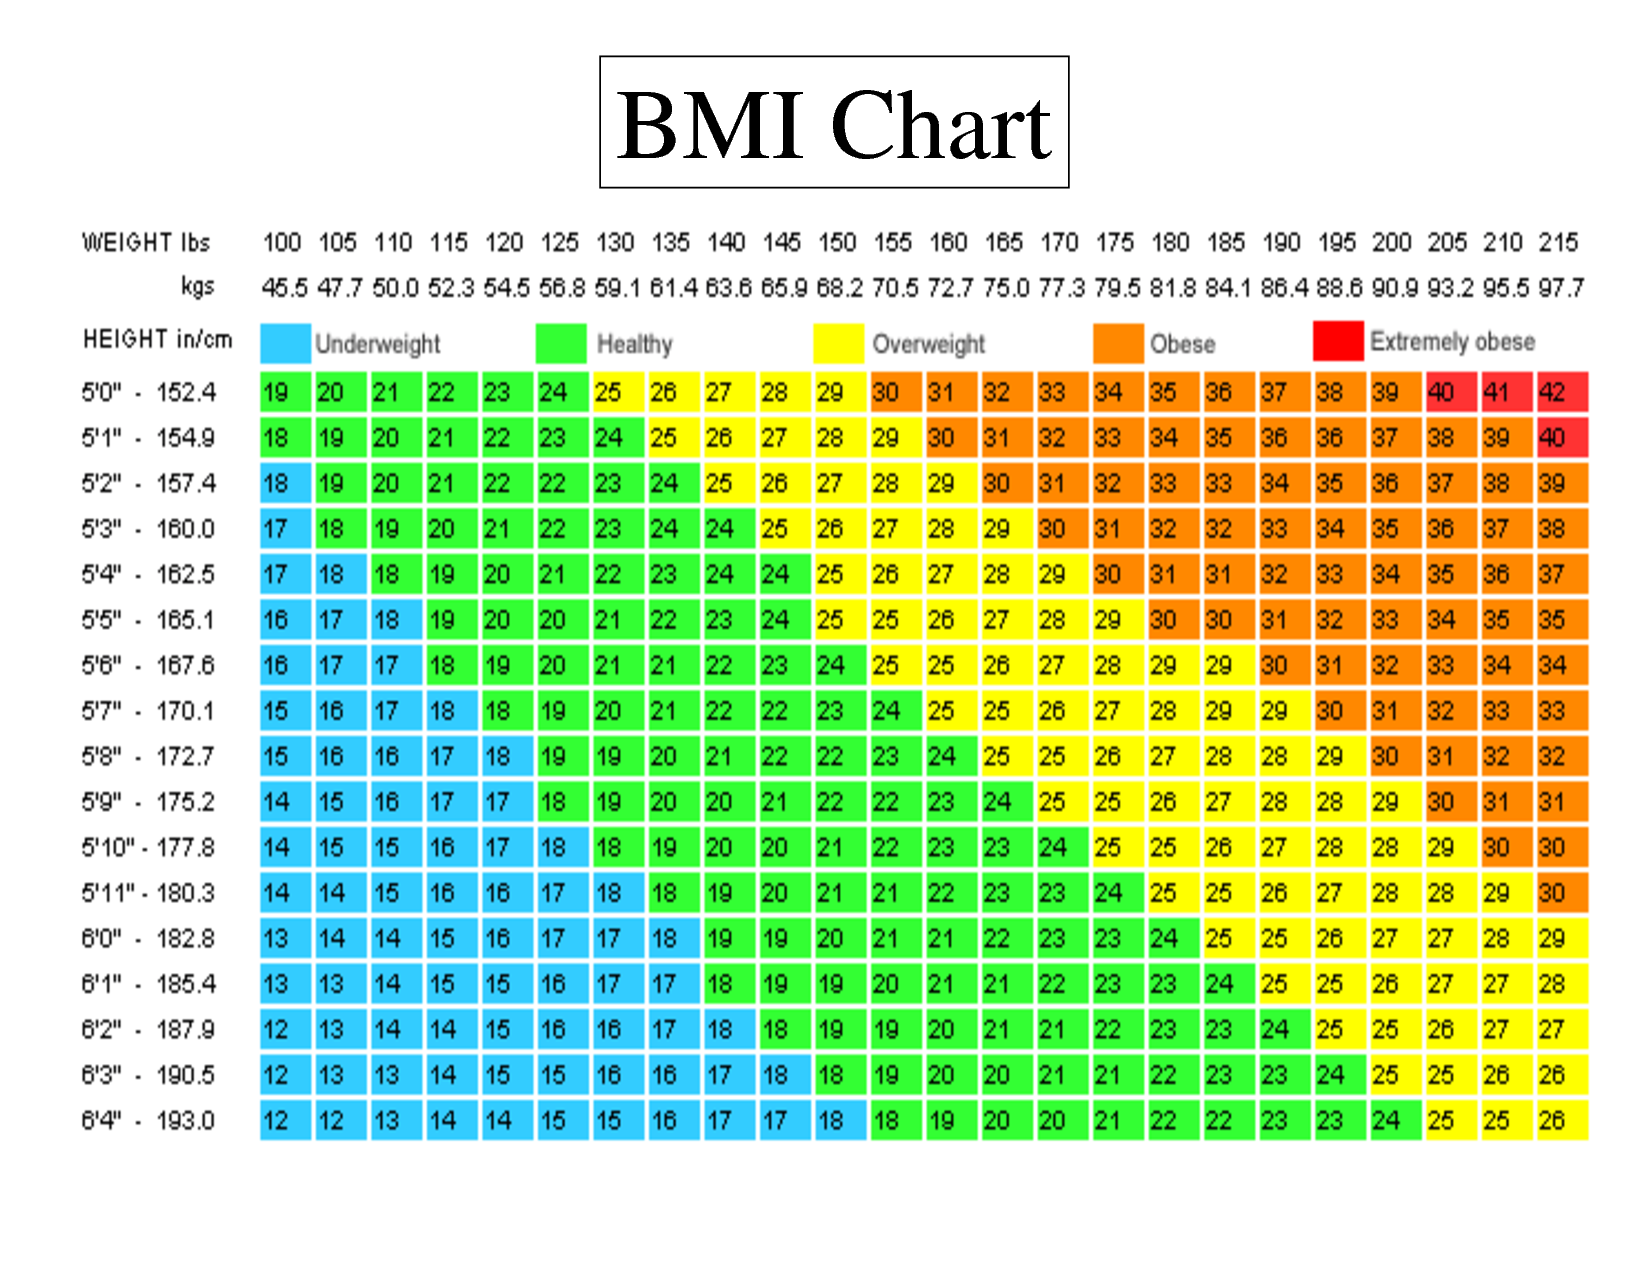

In [19]:
from IPython.display import Image
Image(filename='picture.png') 

We can figure that most of the people in our dataset range from being overweight to being obese which fits when looking at the medical costs.

Please note that women are encoded with the number " 1 "and men as "0". We can notice that there are more male smokers than women smokers. It can be assumed that the total cost of treatment in men will be more than in women, given the impact of smoking. 

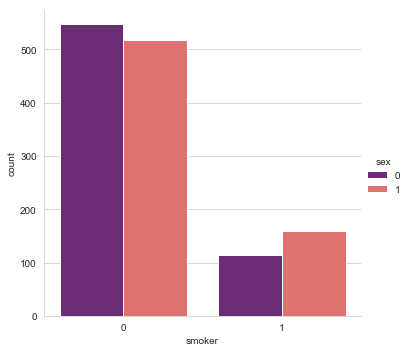

In [20]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="magma", data=data)

The minimum age of patients in our set is 18. Let us take a look at the inferences we can conclude with this specific age category.

Text(0.5, 1.0, 'The number of smokers and non-smokers (18 years old)')

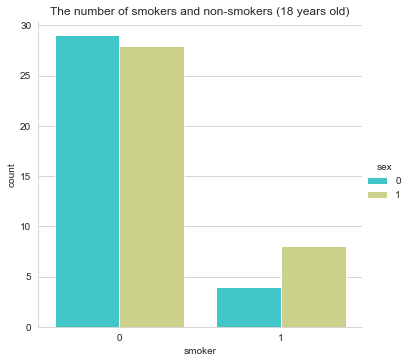

In [21]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=data[(data.age == 18)])
plt.title("The number of smokers and non-smokers (18 years old)")

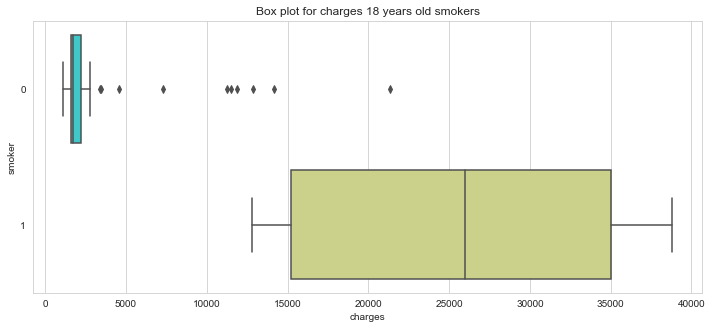

In [22]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges 18 years old smokers")
sns.boxplot(y="smoker", x="charges", data = data[(data.age == 18)] , orient="h", palette = 'rainbow')

As we can see, even at the age of 18 people who smoke spend much more on treatment than non-smokers. Among non-smokers we are seeing some " tails." We can assume that this could be due to illnesses or accidents. Now let's see how the cost of treatment depends on the age of smokers and non-smokers patients.

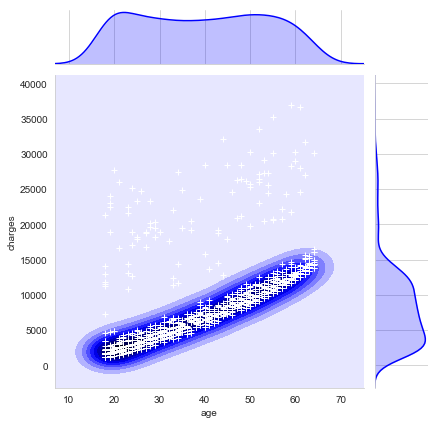

In [23]:
g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 0)], kind = 'kde', color="b")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")

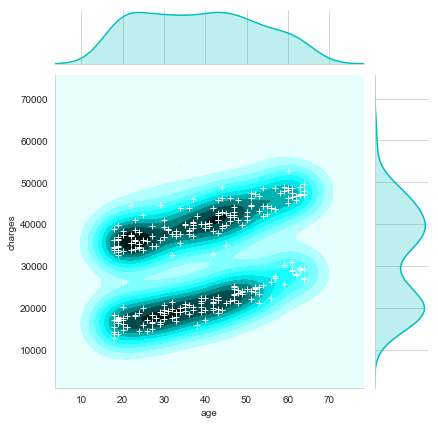

In [24]:
g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 1)],kind="kde", color="c")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")

Text(0.5, 1.0, 'Smokers and non-smokers')

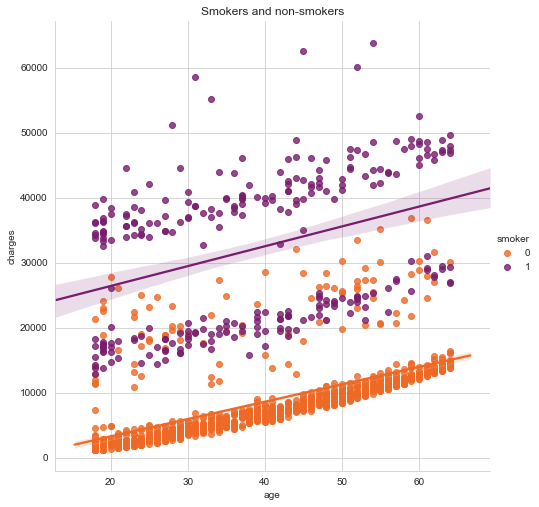

In [25]:
sns.lmplot(x="age", y="charges", hue="smoker", data=data, palette = 'inferno_r', size = 7)
plt.title('Smokers and non-smokers')

In non-smokers, the cost of treatment increases with age which seems logical. In people who smoke, we do not see such dependency. I think that it is not only in smoking but also in the peculiarities of the dataset. Such a strong effect of smoking on the cost of treatment would be more logical to judge having a set of data with a larger number of records and signs. 

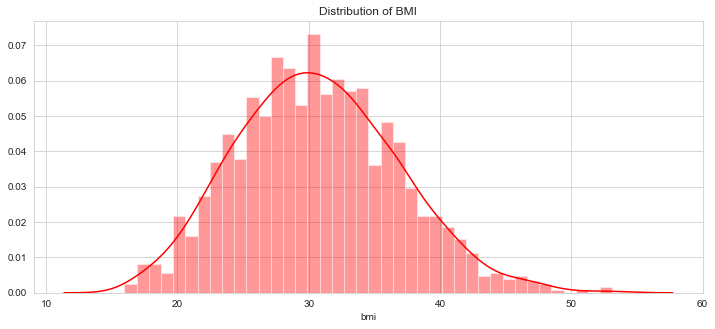

In [22]:
plt.figure(figsize=(12,5))
plt.title("Distribution of BMI")
sns.distplot(data["bmi"], bins = 40,color = 'r')

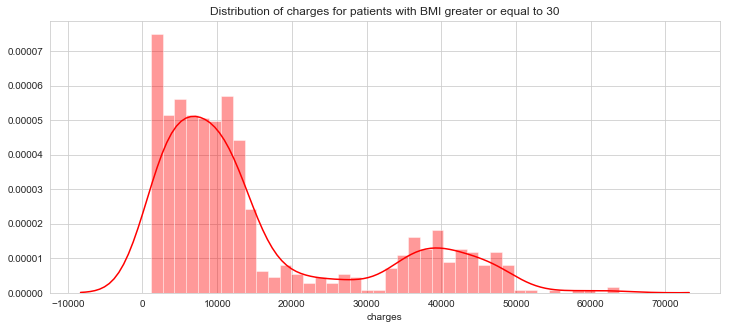

In [23]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI greater or equal to 30")
sns.distplot(data[(data.bmi >= 30)]['charges'], bins = 40,color = 'r')

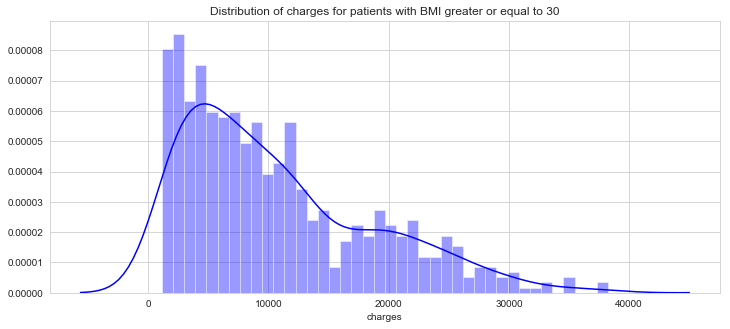

In [24]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI greater or equal to 30")
sns.distplot(data[(data.bmi < 30)]['charges'], bins = 40,color = 'b')

Text(0.5, 1.0, 'Scatter plot of charges and bmi')

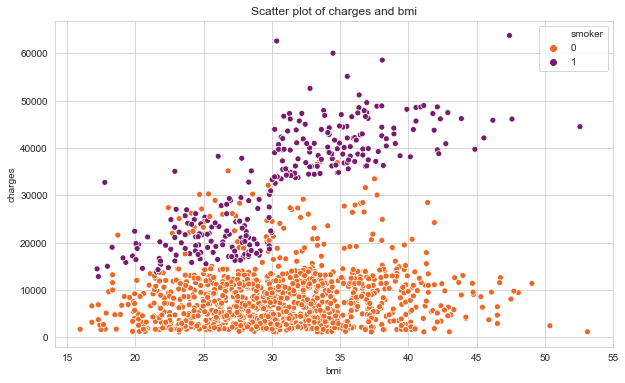

In [25]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='bmi',y='charges',data=data,palette='inferno_r',hue='smoker')
plt.title('Scatter plot of charges and bmi')

As per our expectations, people with higher BMI tend to pay higher costs for medicare. Now, let us see how many children our patients have.

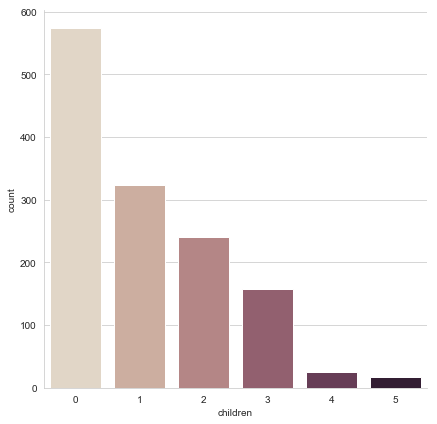

In [26]:
sns.catplot(x="children", kind="count", palette="ch:.25", data=data, size = 6)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [28]:
X = data.drop(['charges'], axis = 1)
y = data.charges

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [30]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

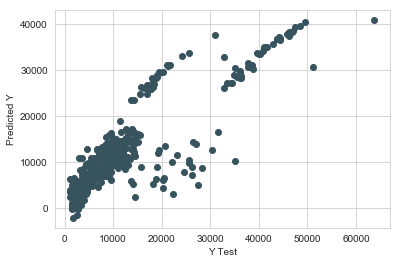

In [32]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

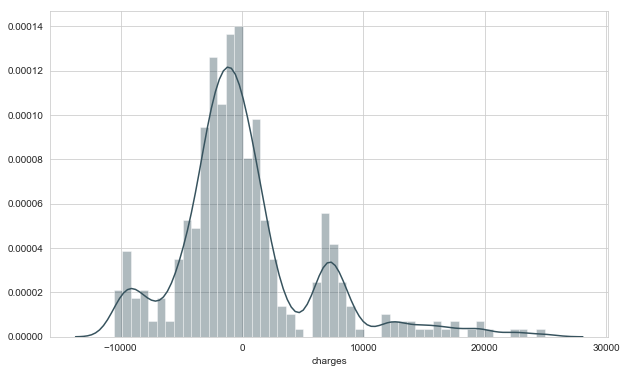

In [33]:
plt.figure(figsize=(10,6))
sns.distplot((y_test-predictions),bins=50)

In [34]:
X = data.drop(['charges','region'], axis = 1)
Y = data.charges



quad = PolynomialFeatures (degree = 2)
X_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(X_quad,Y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(plr.score(X_test,Y_test))

0.8849197344147238


Looks like our model predicts really well the cost of treatment of our patients.

In [37]:
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
forest.fit(X_train,y_train)
forest_train_pred = forest.predict(X_train)
forest_test_pred = forest.predict(X_test)

In [38]:
print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

MSE train data: 3378853.791, MSE test data: 26514422.713
R2 train data: 0.977, R2 test data: 0.811


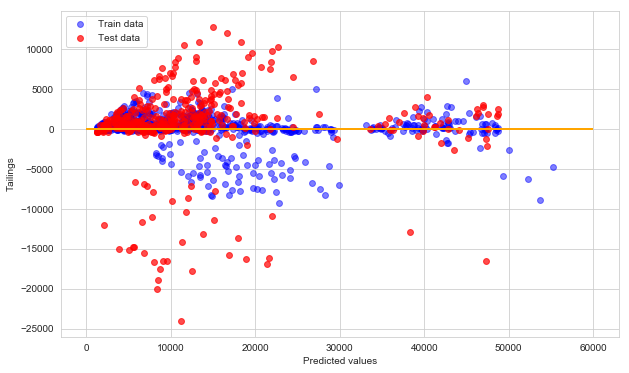

In [39]:
plt.figure(figsize=(10,6))

plt.scatter(forest_train_pred,forest_train_pred - y_train,
          c = 'b', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(forest_test_pred,forest_test_pred - y_test,
          c = 'r', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'orange')
plt.show()

The results seem really great but we do observe a noticeable need of retraining of the algorithm on the training data!

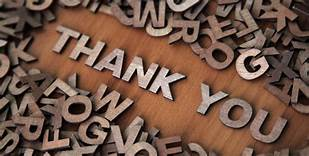

In [42]:
from IPython.display import Image
Image(filename='th.jpeg') 